In [1]:
!pip install pytesseract
!pip install pdf2image
!sudo apt-get install tesseract-ocr
!apt-get install poppler-utils
!pip install Pillow
!pip install pymupdf
!pip install llama-index-readers-file pymupdf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,557 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [2]:
!wget https://s2.q4cdn.com/299287126/files/doc_financials/2024/q1/AMZN-Q1-2024-Earnings-Release.pdf

--2024-07-21 17:37:41--  https://s2.q4cdn.com/299287126/files/doc_financials/2024/q1/AMZN-Q1-2024-Earnings-Release.pdf
Resolving s2.q4cdn.com (s2.q4cdn.com)... 68.70.205.1, 68.70.205.2, 68.70.205.4, ...
Connecting to s2.q4cdn.com (s2.q4cdn.com)|68.70.205.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 343838 (336K) [application/pdf]
Saving to: ‘AMZN-Q1-2024-Earnings-Release.pdf’

AMZN-Q1-2024-Earnin 100%[===================>] 335.78K  --.-KB/s    in 0.03s   

2024-07-21 17:37:41 (9.76 MB/s) - ‘AMZN-Q1-2024-Earnings-Release.pdf’ saved [343838/343838]



Sample Image page 11:

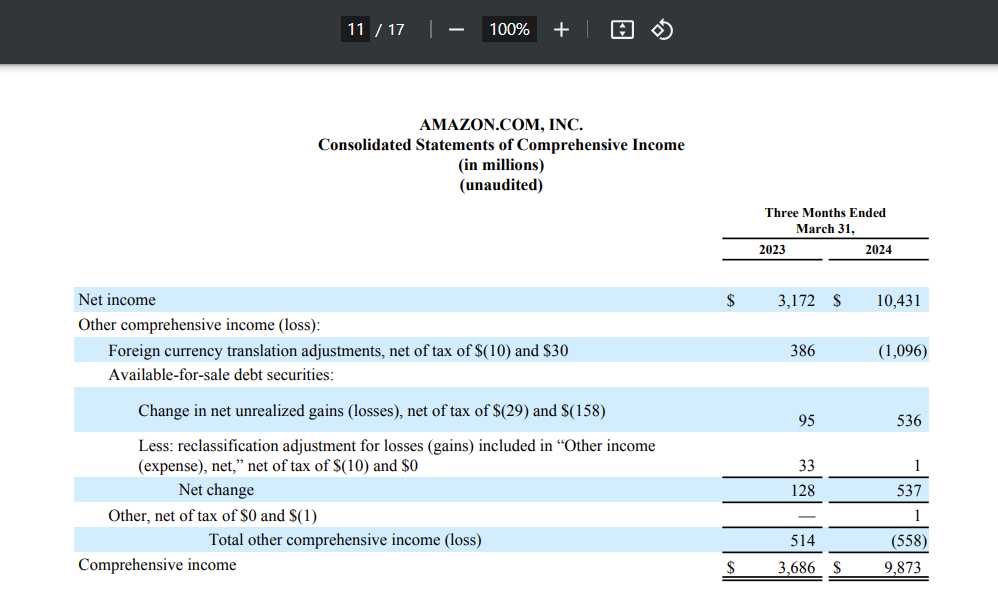

# PyMUPDF

In [3]:
from llama_index.core.schema import TextNode
from llama_index.core.node_parser import SentenceSplitter
import fitz

file_path = "/content/AMZN-Q1-2024-Earnings-Release.pdf"
doc = fitz.open(file_path)
text_parser = SentenceSplitter(
    chunk_size=2048,
)
text_chunks = [] #C
for doc_idx, page in enumerate(doc):
    page_text = page.get_text("text")
    cur_text_chunks = text_parser.split_text(page_text)
    text_chunks.extend(cur_text_chunks)
nodes = [] #D
for idx, text_chunk in enumerate(text_chunks):
    node = TextNode(
        text=text_chunk,
    )
    nodes.append(node)

In [4]:
print(nodes[10].text)

AMAZON.COM, INC.
Consolidated Statements of Comprehensive Income
(in millions)
(unaudited)
  
Three Months Ended
March 31,
 
2023
2024
Net income
$ 
3,172 $ 
10,431 
Other comprehensive income (loss):
Foreign currency translation adjustments, net of tax of $(10) and $30
 
386  
(1,096) 
Available-for-sale debt securities:
Change in net unrealized gains (losses), net of tax of $(29) and $(158)
 
95  
536 
Less: reclassification adjustment for losses (gains) included in “Other income 
(expense), net,” net of tax of $(10) and $0
 
33  
1 
Net change
 
128  
537 
Other, net of tax of $0 and $(1)
 
—  
1 
Total other comprehensive income (loss)
 
514  
(558) 
Comprehensive income
$ 
3,686 $ 
9,873


# OCR

In [5]:
from PIL import Image
import pytesseract
import sys
from pdf2image import convert_from_path
import os

In [6]:
pages = convert_from_path(file_path)
i=10
filename = "page"+str(i)+".jpg"
pages[i].save(filename, 'JPEG')
outfile =  "page"+str(i)+"_text.txt"
f = open(outfile, "a")
text= str(((pytesseract.image_to_string(Image.open(filename)))))
text = text.replace('-\n', '')
f.write(text)
f.close()


In [7]:
print(text)

AMAZON.COM, INC.
Consolidated Statements of Comprehensive Income
(in millions)

(unaudited)
Three Months Ended
March 31,
2023 2024
Net income $ 3,172 §$ 10,431
Other comprehensive income (loss):
Foreign currency translation adjustments, net of tax of $(10) and $30 386 (1,096)
Available-for-sale debt securities:
Change in net unrealized gains (losses), net of tax of $(29) and $(158) 95 536
Less: reclassification adjustment for losses (gains) included in “Other income
(expense), net,” net of tax of $(10) and $0 33 1
Net change 128 231
Other, net of tax of $0 and $(1) _— 1
Total other comprehensive income (loss) 514 (558)

Comprehensive income $ 3,686 $ 9,873



# LlamaParse

In [8]:
import getpass
import os
from copy import deepcopy

os.environ["LLAMA_CLOUD_API_KEY"] = getpass.getpass()

··········


In [9]:
!pip install llama-parse

In [11]:
from llama_parse import LlamaParse
import nest_asyncio
nest_asyncio.apply()
documents = LlamaParse(result_type="markdown").load_data(file_path)
def get_page_nodes(docs, separator="\n---\n"):
    """Split each document into page node, by separator."""
    nodes = [] #C
    for doc in docs:
        doc_chunks = doc.text.split(separator)
        for doc_chunk in doc_chunks:
            node = TextNode(
                text=doc_chunk,
                metadata=deepcopy(doc.metadata),
            )
            nodes.append(node)

    return nodes


nodes_lp = get_page_nodes(documents)

Started parsing the file under job_id df3e90e4-8d8b-4764-98ad-498012e7d090
.

In [12]:
print(nodes_lp[10].text)

# AMAZON.COM, INC.

# Consolidated Statements of Comprehensive Income

| |Three Months Ended March 31, 2023|Three Months Ended March 31, 2024|
|---|---|---|
|Net income|$3,172|$10,431|
|Other comprehensive income (loss):| | |
|Foreign currency translation adjustments, net of tax of $(10) and $30|386|(1,096)|
|Available-for-sale debt securities:| | |
|Change in net unrealized gains (losses), net of tax of $(29) and $(158)|95|536|
|Less: reclassification adjustment for losses (gains) included in “Other income (expense), net,” net of tax of $(10) and $0|33|1|
|Net change|128|537|
|Other, net of tax of $0 and $(1)|—|1|
|Total other comprehensive income (loss)|514|(558)|
|Comprehensive income|$3,686|$9,873|
